# Plotting

#### Configuration

By default, it uses `png` format. We prefer a vectorial format like `svg` for better results. Default font has been changed to _SF Mono_.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib
matplotlib.rcParams['font.family'] = "IBM Plex Mono"

#### Data preparation

We have included some sample data along with the notebooks. To simplify the usage, there's a function called `stock_prices` that you could use to load historical quotes for several well known stocks: `msft`, `goog`, `aapl` and `tsla`:

In [2]:
from sample_data import stock_prices
msft = stock_prices('msft')
msft.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,23.800220,30.950001,31.100000,30.590000,30.620001,38409100.0
2010-01-05,23.807911,30.959999,31.100000,30.639999,30.850000,49749600.0
2010-01-06,23.661804,30.770000,31.080000,30.520000,30.879999,58182400.0
2010-01-07,23.415728,30.450001,30.700001,30.190001,30.629999,50559700.0
2010-01-08,23.577215,30.660000,30.879999,30.240000,30.280001,51197400.0


## Line

<Axes: xlabel='Date'>

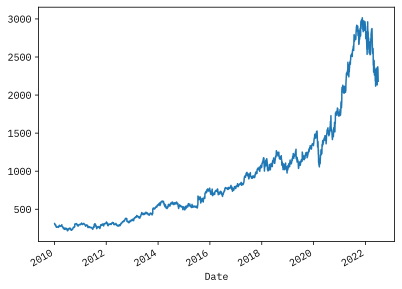

In [3]:
data = stock_prices('goog')
series = data['Close']
series.plot()

## Histograms

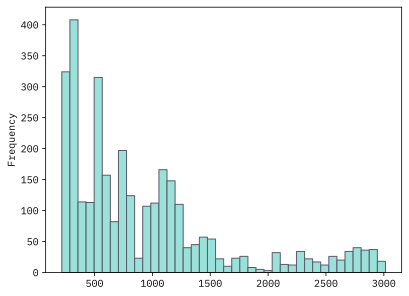

In [4]:
import matplotlib.pyplot as plt
data.Close.plot.hist(bins=40, color='#99E1D9', edgecolor='#5D576B')
plt.show()

Most of the formatting can be controlled setting some [parameters](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html#pandas.DataFrame.plot) in the plot function. Histogram, for instance, uses same parameters.

## Stacked

Possible `colormap` values can be checked [here](http://scipy.github.io/old-wiki/pages/Cookbook/Matplotlib/Show_colormaps).

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

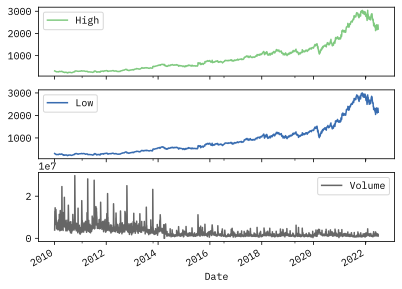

In [5]:
data[["High","Low","Volume"]].plot(subplots=True, colormap='Accent')

## Side-by-side

<Axes: >

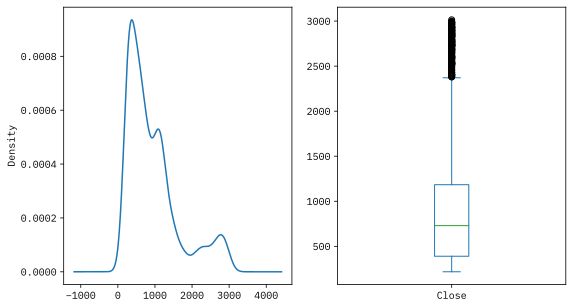

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(9,5))
data.Close.plot.density(ax=axs[0])
data.Close.plot.box(ax=axs[1])

## Mixed

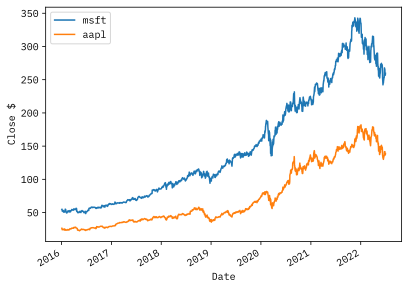

In [7]:
aapl = stock_prices('aapl')

msft.Close["2016":].plot(label="msft")
aapl.Close["2016":].plot(label="aapl")

plt.ylabel("Close $")
plt.legend()
plt.show()

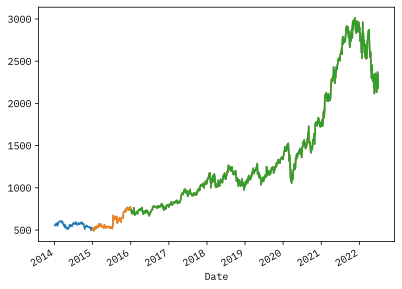

In [8]:
series["2014":].plot()
series["2015":].plot()
series["2016":].plot()
plt.show()

---

## Seaborn

[Seaborn](https://seaborn.pydata.org/) package has some interesting plots available. It's also based on matplotlib.

It should be included by default in Anaconda, otherwise do `pip install seaborn` from the command line.

In [9]:
import seaborn as sns

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

### Line

<Axes: xlabel='Date'>

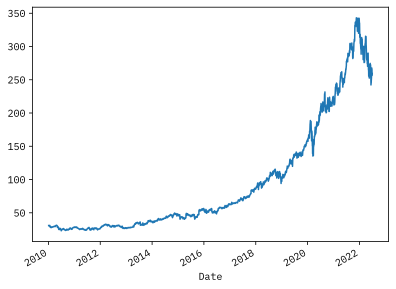

In [10]:
msft.Close.plot.line()

### Distribution

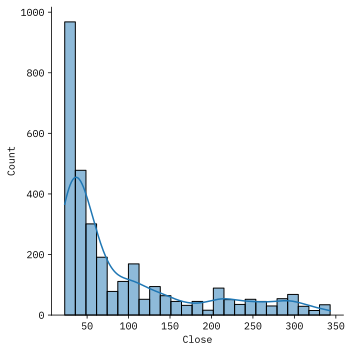

In [11]:
sns.displot(msft.Close, kde=True)

### Heatmaps

We want to produce a graph with values by month and year. As the `Date` index only contains a full date, we could produce two new columns using `month` and `year` values.

In [12]:
msft.loc[:,"Month"] = msft.index.map(lambda d: d.month)
msft.loc[:,"Year"]  = msft.index.map(lambda d: d.year)
msft.tail(3)

,Adj Close,Close,High,Low,Open,Volume,Month,Year
Date,,,,,,,,
2022-06-29,260.260010,260.260010,261.970001,255.759995,257.589996,20069800.0,6,2022
2022-06-30,256.829987,256.829987,259.529999,252.899994,257.049988,31730900.0,6,2022
2022-07-01,259.579987,259.579987,259.769989,254.610001,256.390015,22825200.0,7,2022


Then we can use the `pivot` function to compute a new `DataFrame`. Note we're resampling data to get values at the month level.

In [13]:
msft_pivot = msft.resample("M").fillna(method='ffill').pivot(index="Month", columns="Year", values="Close")
msft_pivot[:3]

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Month,,,,,,,,,,,,,
1,28.180000,27.730000,29.530001,27.450001,37.840000,40.400002,55.090000,64.650002,95.010002,104.430000,170.229996,231.960007,310.980011
2,28.670000,26.580000,31.740000,27.799999,38.310001,43.849998,50.880001,63.980000,93.769997,112.029999,162.009995,232.380005,298.790009
3,29.290001,25.389999,32.259998,28.610001,40.990002,40.660000,55.230000,65.860001,91.269997,117.940002,157.710007,235.770004,308.309998


<Axes: xlabel='Year', ylabel='Month'>

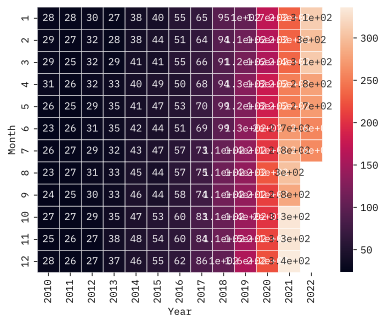

In [14]:
sns.heatmap(msft_pivot, annot=True, linewidths=.5)

## Styling

### Themes

There are five preset seaborn themes: `darkgrid`, `whitegrid`, `dark`, `white`, and `ticks`. By default it uses `darkgrid`.

We can change that for some plots only:

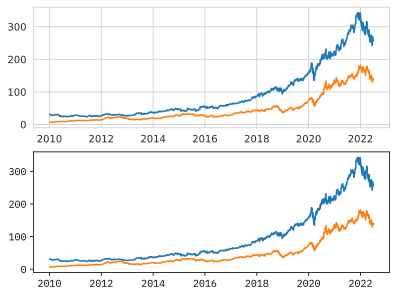

In [15]:
with sns.axes_style("whitegrid"):
    plt.subplot(211)
    plt.plot(msft.Close)
    plt.plot(aapl.Close)
plt.subplot(212)
plt.plot(msft.Close)
plt.plot(aapl.Close)

### Color palletes

Seaborn cames with many [color palletes](https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial), and some utils to work with colors.

To plot a pallete you can use the `palplot` function.

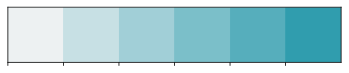

In [16]:
sns.palplot(sns.light_palette((210, 90, 60), input="husl"))

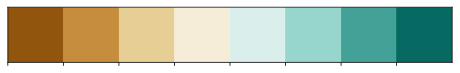

In [17]:
sns.palplot(sns.color_palette("BrBG", 8))

Most of the plotting functions accept a `cmap` parameter where you can set a pallete. When creating a pallete, don't forget to set `as_cmap=True`.

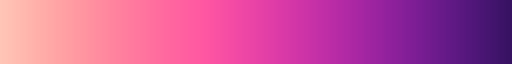

In [18]:
color_map = sns.cubehelix_palette(8, hue=2, as_cmap=True)
color_map

<Axes: xlabel='Year', ylabel='Month'>

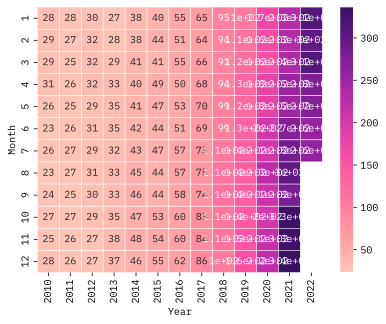

In [19]:
sns.heatmap(msft_pivot, annot=True, linewidths=.5, cmap=color_map)

### Context

There are [several contexts](https://seaborn.pydata.org/generated/seaborn.set_context.html) available: `notebook`, `talk`, `paper` and `poster`, depending on the usage you need for the graph.

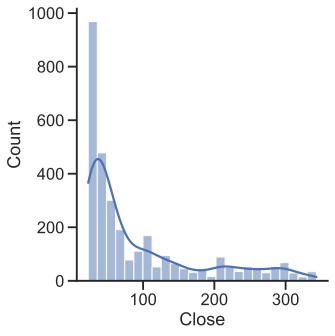

In [20]:
sns.set(style='ticks', context='talk')
sns.displot(msft.Close, kde=True)